In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare Data

In [2]:
cloud_cover = pd.read_csv('Bangkhuntean_CloudCover_2021-16Nov-16Dec.csv',skipinitialspace = True)
cloud_cover['Date'] = cloud_cover[['Year', 'Month', 'Day']].apply(lambda x: "{0}-{1}-{2}".format(str(x[0]).zfill(2), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1) 
cloud_cover['Time'] = cloud_cover[['Hour', 'Minute']].apply(lambda x: "{}:{}".format(str(x[0]).zfill(2), str(x[1]).zfill(2)), axis=1)
cloud_cover.drop(["Year", "Month", "Day", "Hour", "Minute", "Second"], axis=1, inplace=True)  
cloud_cover = cloud_cover.rename(columns={"CloudCover":"cloud_cover"})
cloud_cover = cloud_cover.groupby(['Date', 'Time']).agg(cloud_cover=('cloud_cover','mean')).reset_index()
cloud_cover['DateTime'] = cloud_cover[['Date', 'Time']].apply(lambda x: "{} {}".format(str(x[0]).zfill(2), str(x[1]).zfill(2)), axis=1)
cloud_cover.drop(["Date", "Time"], axis=1, inplace=True)        
cloud_cover['DateTime'] = pd.to_datetime(cloud_cover['DateTime'], format="%Y-%m-%d %H:%M")
cloud_cover.dropna(inplace=True)
cloud_cover


,cloud_cover,DateTime
0,0.990000,2021-11-16 11:15:00
1,0.989000,2021-11-16 11:16:00
2,0.987667,2021-11-16 11:17:00
3,0.987000,2021-11-16 11:18:00
4,0.987000,2021-11-16 11:19:00
...,...,...
15056,0.168000,2021-12-16 13:58:00
15057,0.169000,2021-12-16 13:59:00
15058,0.147000,2021-12-16 14:00:00
15059,0.145000,2021-12-16 14:01:00


<Axes: xlabel='Date', ylabel='cloud_cover'>

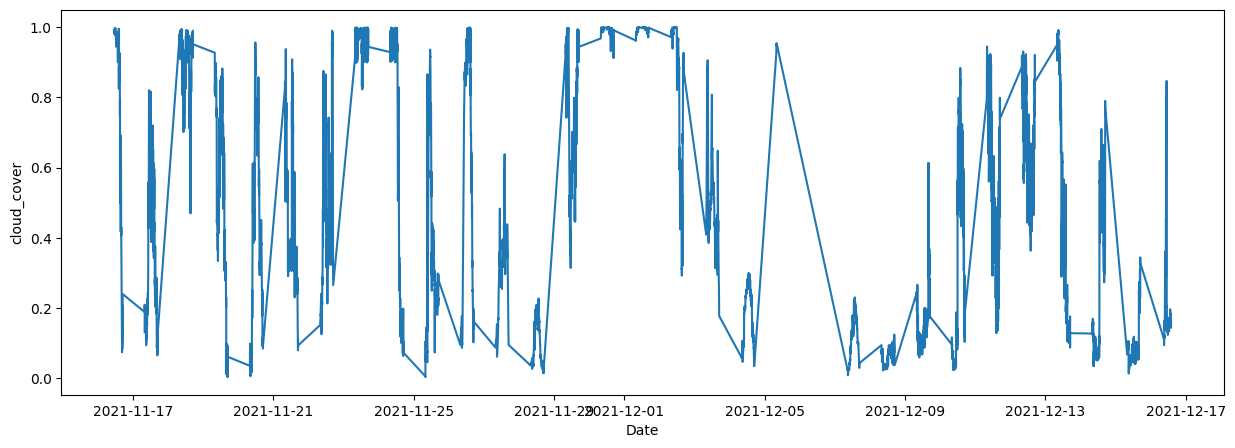

In [4]:
fig1, ax1 = plt.subplots(figsize=(15,5))

plt.xlabel('Date')
plt.ylabel('cloud_cover')
sns.lineplot(x= cloud_cover['DateTime'], y=cloud_cover["cloud_cover"]) 

In [3]:
df = cloud_cover[['DateTime', 'cloud_cover']]
df.columns = ['ds', 'y']
df

,ds,y
0,2021-11-16 11:15:00,0.990000
1,2021-11-16 11:16:00,0.989000
2,2021-11-16 11:17:00,0.987667
3,2021-11-16 11:18:00,0.987000
4,2021-11-16 11:19:00,0.987000
...,...,...
15056,2021-12-16 13:58:00,0.168000
15057,2021-12-16 13:59:00,0.169000
15058,2021-12-16 14:00:00,0.147000
15059,2021-12-16 14:01:00,0.145000


# Train/Test Model

In [15]:
train,test = train_test_split(df, train_size=0.8, shuffle=False)
print('Train Shape', train.shape)
print('Test Shape', test.shape)

Train Shape (12048, 2)
Test Shape (3013, 2)


# Time Series Forecasting with Prophet Prediction

In [19]:
model = Prophet()
model.fit(train)
fcast = model.predict(test)
fcast1 = fcast[['ds','yhat']]
fcast1

16:42:02 - cmdstanpy - INFO - Chain [1] start processing
16:42:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2021-12-10 15:24:00,0.096023
1,2021-12-10 15:25:00,0.094978
2,2021-12-10 15:26:00,0.093943
3,2021-12-10 15:27:00,0.092918
4,2021-12-10 15:28:00,0.091904
...,...,...
3008,2021-12-16 13:58:00,0.029173
3009,2021-12-16 13:59:00,0.027939
3010,2021-12-16 14:00:00,0.026700
3011,2021-12-16 14:01:00,0.025456


<AxesSubplot: xlabel='Date', ylabel='cloud_cover'>

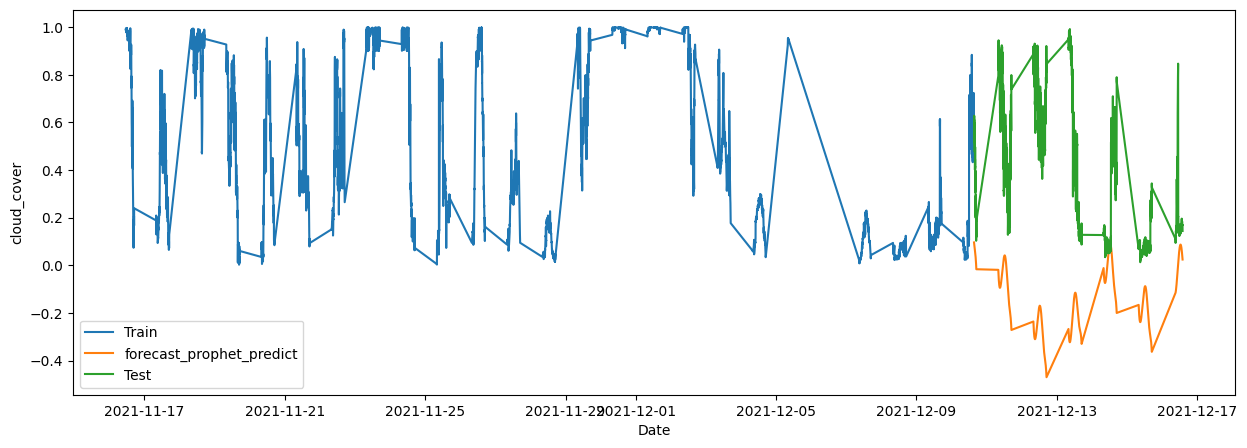

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('cloud_cover')
sns.lineplot(x= train['ds'], y=train["y"],label = 'Train') 
sns.lineplot(x=fcast1['ds'], y = fcast1["yhat"], label = 'forecast_prophet_predict')
sns.lineplot(x=test['ds'], y = test["y"], label = 'Test')